In [1]:
import pandas  as pd
import seaborn as sns
from   sklearn.ensemble import IsolationForest

# **La forêt d'isolement**

In [2]:
df = pd.DataFrame({'StudentId':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                  'Marks': [67, 56, 66, 74, 70, 45, 55, 59, 69, 99, 68, 51, 60, 69, 50]})
df.head()

,StudentId,Marks
0,1,67
1,2,56
2,3,66
3,4,74
4,5,70


## **Quelle est la valeur abérante ?**

<Axes: ylabel='Marks'>

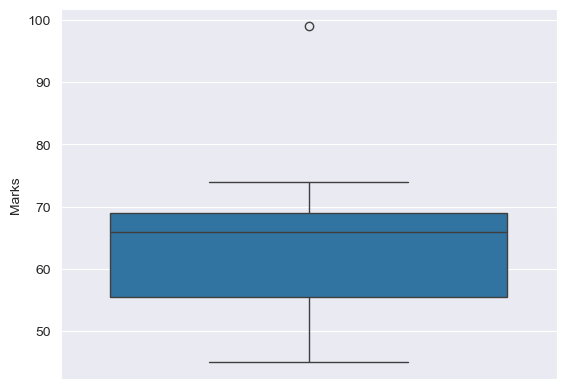

In [3]:
sns.boxplot(df.Marks)

## **Créer un moèdle de forêt d'isolement pour détecter la valeur aberrante (outliée)**

In [4]:
isolation_forest = IsolationForest(contamination=0.01)   # Fixer contamination à la proportion de valeurs aberrantes attendue
isolation_forest.fit(df[['Marks']])

,n_estimators,100
,max_samples,'auto'
,contamination,0.01
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,None
,verbose,0
,warm_start,False


In [5]:
# Prédire les Outliers
outlier_preds = isolation_forest.predict(df[['Marks']])

In [6]:
# Ajouter les prédictions des Outliers au DataFrame
df['Outlier'] = outlier_preds
df

,StudentId,Marks,Outlier
0,1,67,1
1,2,56,1
2,3,66,1
3,4,74,1
4,5,70,1
5,6,45,1
6,7,55,1
7,8,59,1
8,9,69,1
9,10,99,-1


L'outlier est "StudentID = 10".